# Visualization Control System Principles

[Table Of Content](#toc)<a href="TOC"></a>

  * [Introduction](#intro)
  * [What](#what)
  * [How](#how)
    * [one dimensional](#1d)
    * [boxfill](#box)
    * [isoline](#isol)
    * [isofill](#isof)
    * [streamlines](#stream)
    * [meshfill](#mesh)
    * [vectors](#vec)
    * [taylor diagrams](#taylor)
    
  * [Where](#where)
  * [Secondary Objects](#secondary)
    * [Text Objects](#text)
    * [Line/Polygon Objects](#line)
    * [Filled Polygons Objects](#fillarea)
    * [Marker Objects](#marker)
    * [Colormaps](#colormap)
    * [Projections](#projection)

In [1]:
# VCS Objects definitions
import vcs
import cdms2
import os
vcs.download_sample_data_files()
with cdms2.open(os.path.join(vcs.sample_data,"clt.nc")) as f:
    clt = f("clt")
    u = f("u")
    v = f("v")
with cdms2.open(os.path.join(vcs.sample_data,"sampleCurveGrid4.nc")) as f:
    curv = f("sample")
with cdms2.open(os.path.join(vcs.sample_data,"sampleGenGrid3.nc")) as f:
    gen = f("sample")

x = vcs.init(geometry=(600,400),bg=True)

# Styling for notebook
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

Downloading: 'th_yr.nc' from 'https://uvcdat.llnl.gov/cdat/sample_data/' in: /Users/doutriaux1/anaconda2/envs/cdat8/share/uvcdat/sample_data/th_yr.nc
Downloading: 'th_yr.nc' from 'https://uvcdat.llnl.gov/cdat/sample_data/' in: /Users/doutriaux1/anaconda2/envs/cdat8/share/uvcdat/sample_data/th_yr.nc
Downloading: 'th_yr.nc' from 'https://uvcdat.llnl.gov/cdat/sample_data/' in: /Users/doutriaux1/anaconda2/envs/cdat8/share/uvcdat/sample_data/th_yr.nc


## Introduction<a href="intro"></a>

VCS Allows scientists to produce highly customized plots. Everything can be precisely and logically controlled, without any *guessing* game

Essentially a vcs plot can be broken down into three parts

**WHAT** is plotted (e.g data and labels) **HOW** it is rendered (isolines, boxfill, isofill, vectors, etc...) and **WHERE** (location on the page each elements is to be plotted)

## What<a href="what"></a>

This is the scientific piece of information that the user is trying to represent for others (or self) to understand. It can be as raw as a simple numpy object. But it is recommended to use [CDMS](https://github.com/uv-cdat/cdms)'s transient variables. CDNS transient variables contain metadata such as name, units, geospatial information, that can be used by VCS to represent data better.

The [tutorials] section has many documents for CDMS. The CDMS documentation can be found [here](http://readthedocs.org/projects/cdms/)

## How<a href="how"></a>

This describe the data representation, at the highest level it is a `graphics method` i.e *boxfill*, *isofill*, *vectors*, *streamlines*, *line plot*, etc... But it also contains information to further control these plot types, e.g which colors to use, which levels, lines thickness, etc... 

Graphic methods also describe how axes and labels show be represented (e.g which axes values to show and which text to use for it, the user might want to show the `-20.` longitude represented as `20S` or the date `2020-01-15` shown as `Jan 2020` 

Currently VCS supports the following graphic methods:

### Boxfill<a href="box"></a>

Boxfill is used to represent 2 dimensional arrays, filling each array cell with a color representing its value. In the case of rectilinear grids (x and y axes can be representing by a 1 dimension array) represented via CDMS, we use the axes **bounds** to determine the extends of each cell. This is especially useful if an axis is not increasing constantly (e.g, gaussian grid, pressure levels)

For more information on boxfill please see the [dedicated tutorial](https://cdat.llnl.gov/Jupyter/boxfill/boxfill.html).

/Users/doutriaux1/anaconda2/envs/cdat8/lib/python2.7/site-packages/vtk/util/numpy_support.py:135: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  assert not numpy.issubdtype(z.dtype, complex), \


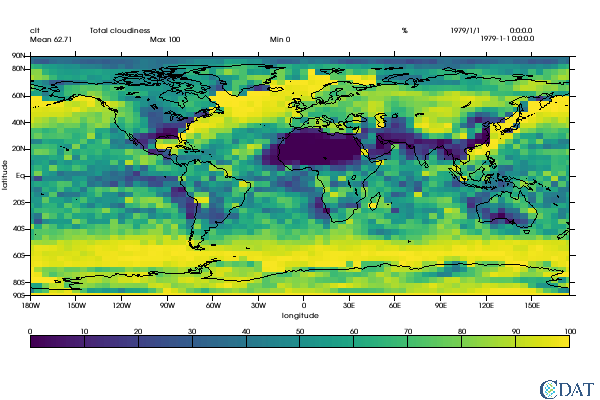

In [2]:
gm = vcs.createboxfill()
x.plot(clt, gm)

### Isoline<a href="isol"></a>

Isoline is a line on a map, chart, or graph connecting points of equal value.

For more information on isolines please see the [dedicated tutorial]().

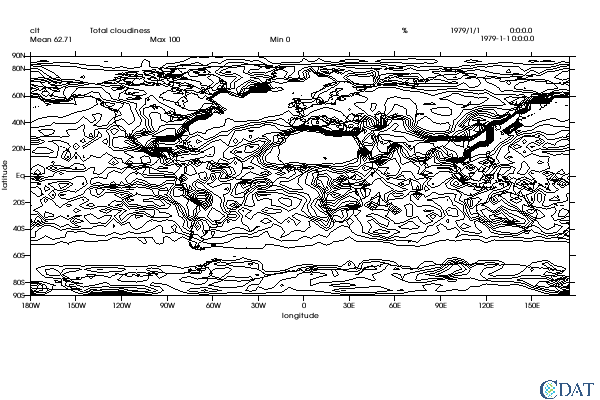

In [3]:
gm = vcs.createisoline()
x.clear()
x.plot(clt,gm)

### Isofill<a href="isof"></a>

Isofill is similar to isolines (and usually plotted in conjounction with it) except that the are between two consecutive isoline is filled with a color representing the range of values in this area.

For more information on boxfill please see the [dedicated tutorial]().

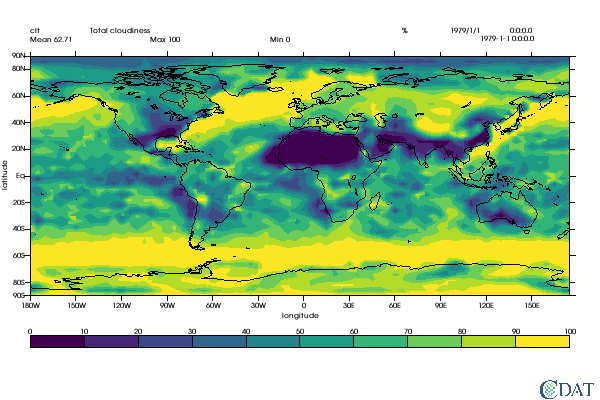

In [4]:
x.clear()
gm = vcs.createisofill()
x.plot(clt,gm)

### Meshfill<a href="mesh"></a>

Meshfill is very similar to boxfill, but is used to represent data on generic grids (a.k.a native representation). Based on the input data and a *mesh*

For more information on meshfill please see the [dedicated tutorial]().

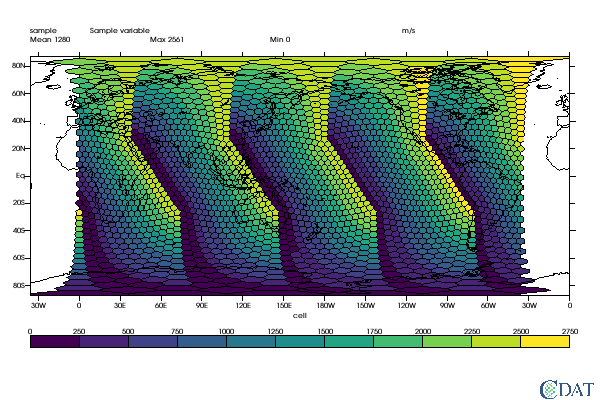

In [5]:
x.clear()
gm = x.createmeshfill()
gm.mesh = True
x.plot(gen, gm)

### Streamlines<a href="stream"></a>

For more information on streamlines please see the [dedicated tutorial](https://cdat.llnl.gov/Jupyter/streamlines/streamlines.html).

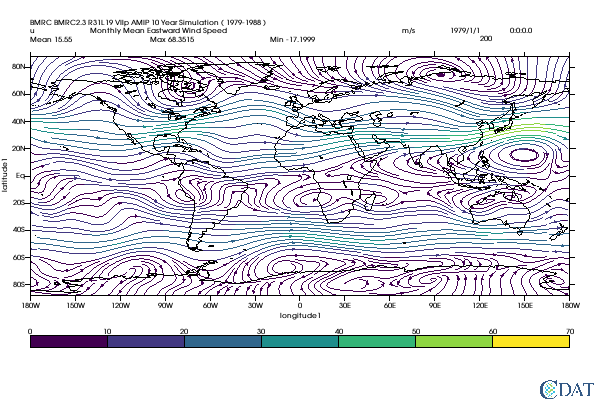

In [6]:
x.clear()
gm = vcs.createstreamline()
x.plot(u,v,gm)

### Vector Plots

Vector plot are a collection of arrows with a given magnitude and direction, each attached to a point in the plane.

For more information on streamlines please see the [dedicated tutorial]().

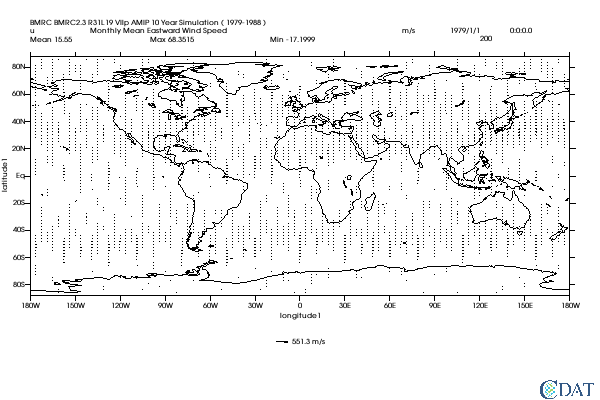

In [7]:
x.clear()
gm = vcs.createvector()
x.plot(u,v, gm)

### Line(1D) Plots<a href="1d"></a>

A graph that shows frequency of data along a number line.

For more information on 1D please see the [dedicated tutorial](). 

Also of interest are the [EzPlot Addons](https://github.com/CDAT/vcsaddons/blob/master/EzPlot/Doc/Jupyter/EzPlot%20Spaghetti%20Example.ipynb). 

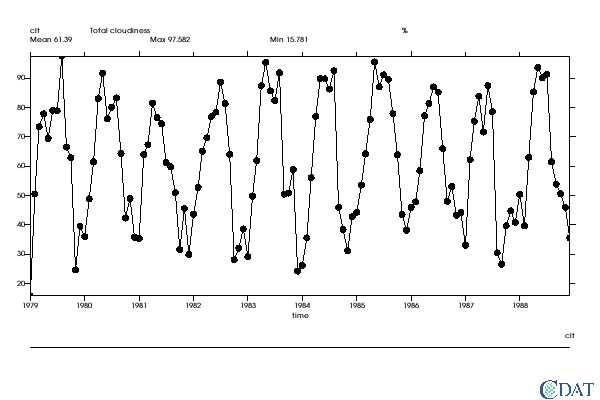

In [8]:
x.clear()
gm = vcs.create1d()
x.plot(clt[:,34,23])  # extract time serie at one point and plot in 1D

### Taylor Diagrams<a href="taylor"></a>

Taylor diagrams are mathematical diagrams designed to graphically indicate which of several approximate representations (or models) of a system, process, or phenomenon is most realistic. This diagram, invented by Karl E. Taylor in 1994 (published in 2001) facilitates the comparative assessment of different models. It is used to quantify the degree of correspondence between the modeled and observed behavior in terms of three statistics: the Pearson correlation coefficient, the root-mean-square error (RMSE) error, and the standard deviation. Taylor diagrams have widely been used to evaluate models designed to study climate and other aspects of Earth’s environment. [See [Wiki](https://en.wikipedia.org/wiki/Taylor_diagram#cite_note-8) and [Taylor (2001)](http://onlinelibrary.wiley.com/doi/10.1029/2000JD900719/abstract) for details]

Reference: [Taylor, K. E. 2001: Summarizing multiple aspects of model performance in a single diagram. Journal of Geophysical Research, 106(D7): 7183-7192](http://onlinelibrary.wiley.com/doi/10.1029/2000JD900719/abstract)


For more detailed information on Taylor Diagrams see this [dedicated tutorial](https://cdat.llnl.gov/Jupyter/Taylor_Diagrams/Taylor_Diagrams.html).

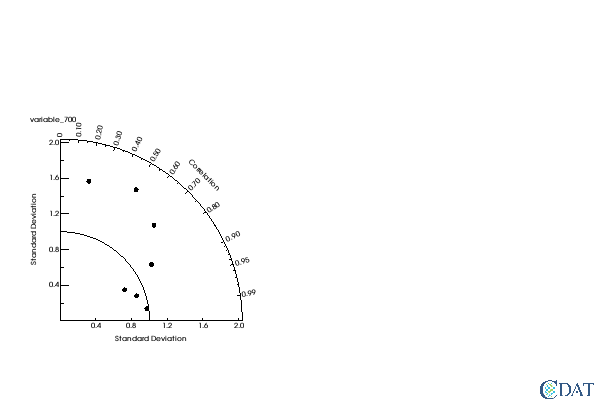

In [9]:
corr = [.2, .5, .7, .85, .9, .95, .99]
std = [1.6, 1.7, 1.5, 1.2 , .8, .9, .98]
data = cdms2.MV2.array(zip(std, corr))
gm = vcs.createtaylordiagram()
x.clear()
x.plot(data,gm)

## Where<a href="where"></a>

This is the most complicated part of VCS but also one of the most powerful. This controls precisely the location of every component on the plot, these *control* objects are called `templates`. Templates also contain one exception to the WHAT/HOW./WHERE rule as they control texts information, albeit via [primary](#primary) objects.

## Bringing it all together

## Secondary  Objects<a id="secondary"></a>


### Positioning Secondary objects<a id="position"></a>

Secondary object positioning is based on a double system.

The most basic is called **world coordinate** by changing a secondary object's `worldcoordinate` attribute you can control the coordinates of the rectangle arrea within which the object will be plottted.

All coordinate (`.x` and `.y`) are relative to the worldcoordinate attribute (defautling to 0->1)

Any coordinate/segment extending beyond the `viewport` rectangle is cropped

See figure bellow for a visual explanation, along with the [vcs script](viewport_and_worldcoordinate.py) to generate it:

<img src="./vp_and_wc.png" border=1px>

### Text Objects<a id="text"></a>

Text object allow you insert text anywhere on the plot
Text object are made by combining two different secondary object: text orientation objects and text table objects

For more details on text in vcs see this [dedicated tutorial]().

---------- Text combined (Tc) member (attribute) listings ----------
secondary method = Tc
 ---------- Text Table (Tt) member (attribute) listings ----------
Tt_name = __texttable_234945596800910
font = 1
spacing = 2
expansion = 100
color = [0.0, 0.0, 0.0, 100.0]
fillincolor = 0
priority = 1
string = ['A Text Object']
viewport = [0.0, 1.0, 0.0, 1.0]
worldcoordinate = [0.0, 1.0, 0.0, 1.0]
x = [0.5]
y = [0.5]
projection = default
 ---------- Text Orientation (To) member (attribute) listings ----------
To_name = __textorientation_24296950101449
height = 25
angle = 0
path = right
halign = left
valign = half


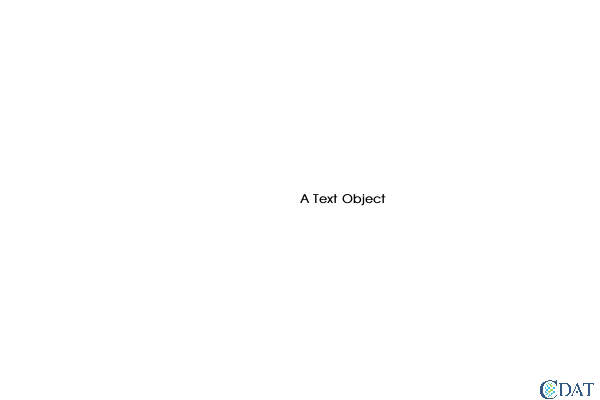

In [10]:
x.clear()
txt = vcs.createtext()
txt.string="A Text Object"
txt.height=25
txt.x = [.5]
txt.y=[.5]
txt.list()
x.plot(txt)

### Line/Polygon Objects<a id="line"></a>

Line object allow you to draw lines on the plot. By closing the line you can draw a polygon

For more details on line in vcs see this [dedicated tutorial]().

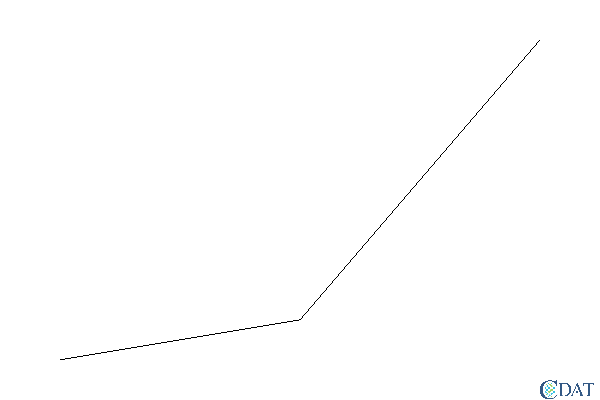

In [11]:
x.clear()
line = vcs.createline()
line.x = [0.1, .5,  0.9]
line.y = [0.1, .2, 0.9]
x.plot(line)

### Filled Polygons Objects<a id="fillarea"></a>
Allows you to draw a filled polygon on the plot

For more details on filled polygons in vcs see this [dedicated tutorial]().

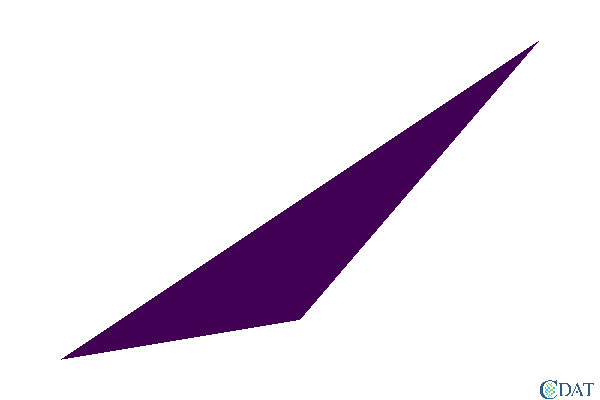

In [12]:
x.clear()
filled = vcs.createfillarea()
filled.x = [0.1, .5,  0.9]
filled.y = [0.1, .2, 0.9]
x.plot(filled)

### Marker Objects<a id="marker"></a>

Allows you to draw a/many markers on a plot

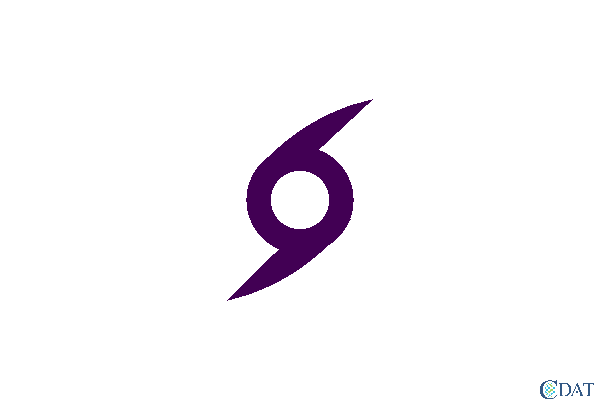

In [13]:
x.clear()
mrk = vcs.createmarker()
mrk.type = "hurricane"
mrk.x = [.5]
mrk.y = [.5]
mrk.size = 15
x.plot(mrk)

### Colormap Objects<a id="colormap"></a>
colormap object objects are used to control the colors on vcs plots, they can be attached to secondary object, graphic methods or canvases.
Values are in red, green, blue, opacity percents (0 to 100)

For more detail see this [dedicated tutorial](https://cdat.llnl.gov/Jupyter/Colormap_Create/Color_map_create_own.html).

In [14]:
cmap = vcs.createcolormap()
cmap.setcolorcell(0,100,0,0,50)  # 50% transparent red color

### Projection Objects<a id="projection"></a>

when plotting lat/lon plots (2d graphic methods) you can specifiy and control the projection associated with it. Projection object are then attached to the graphic method

For more detail see this [dedicated tutorial]().

---------- Projection (Proj) member (attribute) listings ----------
('secondary method =', 'Proj')
('name =', '__projection_508306013994393')
('type =', 'lambert conformal c')
('smajor', '=', 1e+20)
('sminor', '=', 1e+20)
('standardparallel1', '=', 1e+20)
('standardparallel2', '=', 1e+20)
('centralmeridian', '=', 1e+20)
('originlatitude', '=', 1e+20)
('falseeasting', '=', 1e+20)
('falsenorthing', '=', 1e+20)


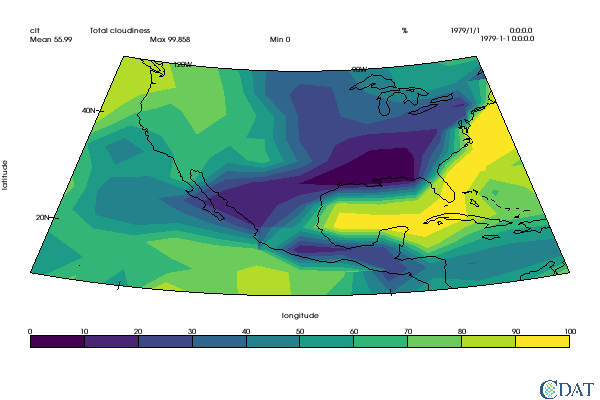

In [15]:
x.clear()
gm = vcs.createisofill()
proj = vcs.createprojection()
proj.type="lambert"
proj.list()
proj.originlatitude=30.
gm.projection = proj
x.plot(clt(latitude=(10,50),longitude=(-130,-70)), gm)